In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import re
import unidecode
from tqdm import tqdm
tqdm.pandas()
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression

# import nltk
# nltk.download('wordnet')

df = pd.read_json("C:\\Users\\newna\\Downloads\\data.json")
df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [223]:
X = df['ingredients']
y = df['cuisine']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, random_state=42)
train = pd.concat([X_train, Y_train], axis=1)
test = pd.concat([X_test, Y_test], axis=1)

In [224]:
ingredients = np.hstack(df['ingredients'])
ingredients

array(['romaine lettuce', 'black olives', 'grape tomatoes', ...,
       'roma tomatoes', 'celery', 'dried oregano'], dtype='<U71')

In [225]:
cuisines = train['cuisine'].unique()
cuisines

array(['russian', 'moroccan', 'indian', 'italian', 'cajun_creole',
       'southern_us', 'spanish', 'vietnamese', 'japanese', 'french',
       'mexican', 'greek', 'chinese', 'korean', 'british', 'brazilian',
       'filipino', 'jamaican', 'thai', 'irish'], dtype=object)

<Axes: xlabel='cuisine'>

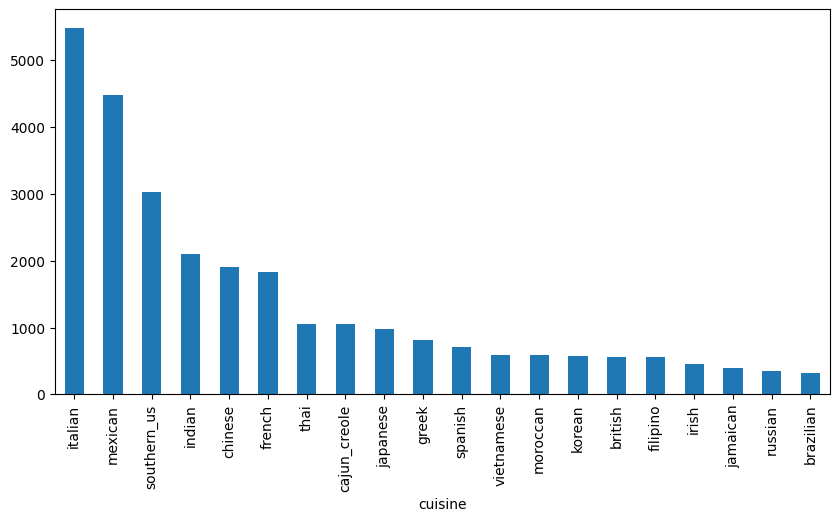

In [226]:
Y_train.value_counts().plot.bar(figsize=(10, 5))

In [227]:
most_popular = []
for cuis in cuisines: 
    cuisine = train[train['cuisine'] == f'{cuis}']
    cuisine_ings = np.hstack(cuisine['ingredients'])
    counts = Counter(cuisine_ings)
    most_popular.append([ing[0] for ing in counts.most_common(10)])

In [228]:
popular_ings = pd.DataFrame(np.array(most_popular).T, columns=cuisines)
popular_ings

,russian,moroccan,indian,italian,cajun_creole,southern_us,spanish,vietnamese,japanese,french,mexican,greek,chinese,korean,british,brazilian,filipino,jamaican,thai,irish
0,salt,salt,salt,salt,salt,salt,salt,fish sauce,soy sauce,salt,salt,salt,soy sauce,soy sauce,salt,salt,salt,salt,fish sauce,salt
1,sugar,olive oil,onions,olive oil,onions,butter,olive oil,sugar,salt,sugar,onions,olive oil,corn starch,sesame oil,all-purpose flour,onions,garlic,onions,garlic,all-purpose flour
2,onions,ground cumin,garam masala,garlic cloves,garlic,all-purpose flour,garlic cloves,salt,mirin,unsalted butter,ground cumin,dried oregano,sesame oil,garlic,butter,olive oil,onions,water,salt,butter
3,all-purpose flour,onions,water,grated parmesan cheese,green bell pepper,sugar,extra-virgin olive oil,garlic,water,all-purpose flour,garlic,feta cheese crumbles,salt,green onions,milk,water,water,garlic,coconut milk,onions
4,eggs,garlic cloves,garlic,garlic,butter,large eggs,onions,water,sugar,olive oil,olive oil,garlic cloves,sugar,sugar,eggs,garlic cloves,soy sauce,pepper,vegetable oil,potatoes
5,butter,ground cinnamon,ground turmeric,ground black pepper,olive oil,baking powder,tomatoes,carrots,sake,butter,chili powder,extra-virgin olive oil,garlic,salt,unsalted butter,garlic,pepper,ground allspice,sugar,baking powder
6,water,water,cumin seed,extra-virgin olive oil,cayenne pepper,water,water,shallots,rice vinegar,large eggs,jalapeno chilies,fresh lemon juice,water,water,sugar,lime,oil,dried thyme,soy sauce,baking soda
7,sour cream,ground ginger,ground cumin,onions,cajun seasoning,unsalted butter,ground black pepper,soy sauce,vegetable oil,water,sour cream,garlic,green onions,sesame seeds,onions,sugar,ground black pepper,scallions,garlic cloves,milk
8,unsalted butter,paprika,vegetable oil,water,all-purpose flour,milk,pepper,garlic cloves,scallions,garlic cloves,avocado,ground black pepper,vegetable oil,onions,baking powder,tomatoes,sugar,garlic cloves,water,sugar
9,large eggs,carrots,oil,butter,water,eggs,red bell pepper,vegetable oil,sesame oil,ground black pepper,garlic cloves,pepper,scallions,scallions,water,cachaca,carrots,vegetable oil,fresh lime juice,carrots


In [229]:
train['ing_count'] = [len(ings) for ings in train['ingredients']]
test['ing_count'] = [len(ings) for ings in test['ingredients']]
train

,ingredients,cuisine,ing_count
28066,"[eggs, vegetable oil, dry bread crumbs, garlic...",russian,12
12292,"[olive oil, all-purpose flour, leg of lamb, sa...",moroccan,16
34076,"[chili pepper, cucumber, tomatoes, cilantro, s...",indian,8
5222,"[dijon mustard, salt, uncooked ziti, cooking s...",italian,9
37491,"[olive oil, ground white pepper, french baguet...",italian,9
...,...,...,...
6265,"[tomato purée, butter, salt, taco seasoning, p...",mexican,17
11284,"[marsala wine, butter, olive oil, fresh mushro...",italian,7
38158,"[blue crabs, peeled fresh ginger, soy sauce, s...",chinese,8
860,"[pepper, spicy brown mustard, boneless chicken...",southern_us,8


<Axes: xlabel='ing_count', ylabel='count'>

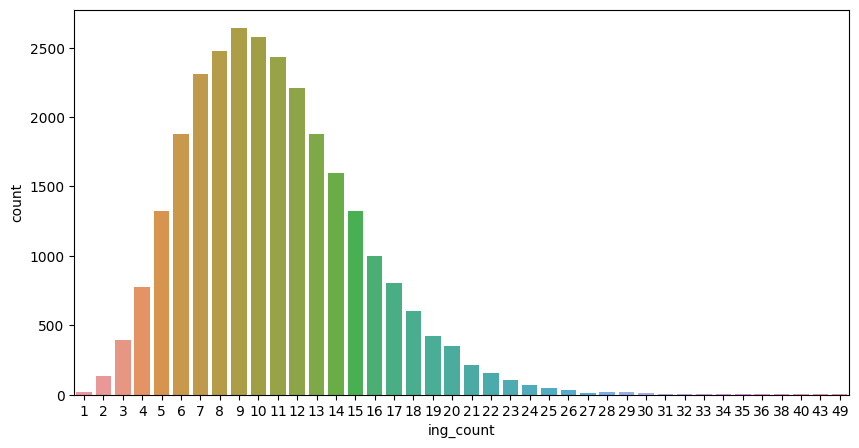

In [230]:
plt.figure(figsize=(10,5))
sns.countplot(x='ing_count',data=train)

In [231]:
lemmatizer = WordNetLemmatizer()
def preprocess(ingredients):
    ingredients_text = ' '.join(ingredients)
    ingredients_text = ingredients_text.lower() #Lower - Casing
    ingredients_text = ingredients_text.replace('-', ' ') # Removing Hyphen
    words = []
    for word in ingredients_text.split():
        word = re.sub("[0-9]"," ",word) #removing numbers,punctuations and special characters
        word = re.sub((r'\b(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\b'), ' ', word) # Removing Units
        if len(word) <= 2: continue # Removing words with less than two characters
        word = unidecode.unidecode(word) #Removing accents
        word = lemmatizer.lemmatize(word) #Lemmatize
        if len(word) > 0: words.append(word)
    return ' '.join(words)

In [232]:
train['x'] = train['ingredients'].progress_apply(preprocess)
test['x'] = test['ingredients'].progress_apply(preprocess)

100%|██████████████████████████████████████████████████████████████████████████| 11933/11933 [00:05<00:00, 2028.34it/s]


In [233]:
train_X = train.drop(['cuisine'], axis = 1)
train_target = train['cuisine']
test_X = test.drop(['cuisine'], axis = 1)
test_target = test['cuisine']

In [234]:
vectorizer = CountVectorizer()

In [235]:
X = vectorizer.fit_transform(train['x'])

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(train_target)

x_train, x_valid, y_train, y_valid = train_test_split(X, y_transformed, test_size=0.3, train_size=0.7, random_state = 42)

model = LogisticRegression(random_state=42)

model2 = ExtraTreesClassifier(random_state = 42)

model.fit(x_train, y_train)
model2.fit(x_train, y_train)

predictions = model.predict(x_valid)
predictions2 = model2.predict(x_valid)

print('LogisticRegression We get a score of : {:.2f}'.format(model.score(x_valid, y_valid) * 100))
print('ExtraTreesClassifier We get a score of : {:.2f}'.format(model2.score(x_valid, y_valid) * 100))

C:\Users\newna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression We get a score of : 76.73
ExtraTreesClassifier We get a score of : 75.77


In [236]:
# Определение параметров и их значений для перебора
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Создание модели и настройка с использованием решетчатого поиска
rf_model = LogisticRegression()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Вывод наилучших гиперпараметров и оценки
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

C:\Users\newna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\newna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters: {'solver': 'liblinear'}
Best Cross-Validation Score: 0.7717051690049035


In [239]:
data = pd.concat([train_X, test_X], axis=0)
target = pd.concat([train_target, test_target], axis=0)

X_train = vectorizer.fit_transform(data['x'])

encoder = LabelEncoder()
target_data = encoder.fit_transform(target)


x_train, x_test, y_train, y_test = train_test_split(X_train, target_data, shuffle=False, test_size=0.3, train_size=0.7)

f_model = LogisticRegression(solver='liblinear')

f_model.fit(x_train, y_train)
predictions = f_model.predict(x_test)

print('LogisticRegression We get a score of : {:.2f}'.format(f_model.score(x_test, y_test) * 100))

LogisticRegression We get a score of : 78.07
